In [1]:
import pandas as pd
import os


In [2]:
#importing dataset
df1 = pd.read_csv(r'C:\Users\tsatr\Documents\BootCamp\Project-IV---T-S-Team\Resources\Insta-Cart_online_grocery_basket\products.csv')
df2 = pd.read_csv(r'C:\Users\tsatr\Documents\BootCamp\Project-IV---T-S-Team\Resources\Insta-Cart_online_grocery_basket\aisles.csv')
df3 = pd.read_csv(r'C:\Users\tsatr\Documents\BootCamp\Project-IV---T-S-Team\Resources\Insta-Cart_online_grocery_basket\departments.csv')
df4 = pd.read_csv(r'C:\Users\tsatr\Documents\BootCamp\Project-IV---T-S-Team\Resources\Insta-Cart_online_grocery_basket\order_products__train.csv')
df5 = pd.read_csv(r'C:\Users\tsatr\Documents\BootCamp\Project-IV---T-S-Team\Resources\Insta-Cart_online_grocery_basket\orders.csv')


In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(49688, 4)
(134, 2)
(21, 2)
(1384617, 4)
(3421083, 7)


In [4]:
#merging databases into one database
df6 = pd.merge(df2, df1, how='inner', on='aisle_id')

In [5]:
df6.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


In [6]:
df7 = pd.merge(df6, df3, how='inner', on='department_id')
df7.head()

,aisle_id,aisle,product_id,product_name,department_id,department
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli
1,1,prepared soups salads,554,Turkey Chili,20,deli
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20,deli
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20,deli
4,1,prepared soups salads,2539,Original Potato Salad,20,deli


In [7]:
df8 = pd.merge(df4, df7, how='inner', on='product_id')
df8.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,department
0,1,49302,1,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
1,816049,49302,7,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
2,1242203,49302,1,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
3,1383349,49302,11,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
4,1787378,49302,8,0,120,yogurt,Bulgarian Yogurt,16,dairy eggs


In [8]:
df9 = pd.merge(df5, df8, how='inner', on='order_id')
df9.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,department
0,1187899,1,train,11,4,8,14.0,49235,10,1,53,cream,Organic Half & Half,16,dairy eggs
1,1187899,1,train,11,4,8,14.0,46149,11,1,77,soft drinks,Zero Calorie Cola,7,beverages
2,1187899,1,train,11,4,8,14.0,196,1,1,77,soft drinks,Soda,7,beverages
3,1187899,1,train,11,4,8,14.0,27845,9,0,84,milk,Organic Whole Milk,16,dairy eggs
4,1187899,1,train,11,4,8,14.0,38928,3,1,120,yogurt,0% Greek Strained Yogurt,16,dairy eggs


In [9]:
online_orders_df = df9.drop(['aisle_id', 'department_id', 'eval_set', 'order_number'], axis=1)
online_orders_df.head()

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs


In [10]:
online_orders_df.to_csv((r'C:\Users\tsatr\Documents\BootCamp\Project-IV---T-S-Team\Resources\Insta-Cart_online_grocery_basket\online_orders.csv'), index=False, header=True)

In [15]:
instacart_df = online_orders_df.groupby("order_hour_of_day")
instacart_df.head()

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
6591,411854,987,1,1,30.0,23734,1,1,other creams cheeses,Sour Cream,dairy eggs
10130,6695,1540,1,1,8.0,26317,11,1,juice nectars,Organic Lemonade,beverages
10131,6695,1540,1,1,8.0,6184,19,1,packaged produce,Clementines,produce
10132,6695,1540,1,1,8.0,30720,18,1,fresh vegetables,Sugar Snap Peas,produce


In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import seaborn as sns

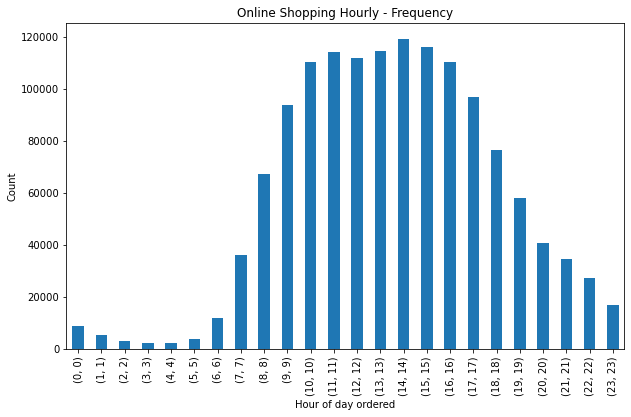

In [28]:
instacart_df['order_hour_of_day'].value_counts().plot(kind='bar')
plt.title('Online Shopping Hourly - Frequency')
plt.ylabel('Count')
plt.xlabel('Hour of day ordered')
plt.savefig("Hour_of_Day_ordered.png")
plt.show()
